In [102]:
import datetime as datetime

today=str(datetime.date.today())

In [103]:
yesterday= str(datetime.date.today() - datetime.timedelta(days=1))
yesterday

'2022-02-16'

In [104]:
import pandas as pd

df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/daily_tweets/2022-02-16.csv')
df.shape

(200, 5)

In [105]:
sentiment= df[df['sentiment']!= 0.0].sentiment.mean()
sentiment

0.12464367872752966

In [106]:
df.head()

,Unnamed: 0,text,created_at,clean_text,sentiment
0,0,Large cap stocks with the most shares traded t...,2022-02-16 23:57:05+00:00,Large stocks with most shares traded today sha...,0.357143
1,1,How do iPhone sales thru carriers work? Is thi...,2022-02-16 23:45:11+00:00,iPhone sales thru carriers work this consignme...,0.000000
2,2,$AAPL Apple Stock Is Beating the Rest of Big T...,2022-02-16 23:43:18+00:00,AAPL Apple Stock Beating Rest Tech,0.000000
3,3,Apple's 2022 iPad Pro: What to Expect https://...,2022-02-16 23:26:04+00:00,Apple iPad What Expect https mNSvytnJdc AAPL h...,0.000000
4,4,in the future to begin with you will need an a...,2022-02-16 23:07:16+00:00,future begin with will need apple watch with a...,0.000000


In [107]:
#REMOVE OBVIOUS WORDS:

df['clean_text'] = df['clean_text'].str.replace("Apple", " ")
df['clean_text'] = df['clean_text'].str.replace("apple", " ")
df['clean_text'] = df['clean_text'].str.replace("https", " ")
df['clean_text'] = df['clean_text'].str.replace("APPLE", " ")
df['clean_text'] = df['clean_text'].str.replace("AAPL", " ")
df['clean_text'] = df['clean_text'].str.replace("stock", " ")
df['clean_text'] = df['clean_text'].str.replace("Google", " ")
df['clean_text'] = df['clean_text'].str.replace("GOOGL", " ")
df['clean_text'] = df['clean_text'].str.replace("Nasdaq", " ")
df['clean_text'] = df['clean_text'].str.replace("NVDA", " ")
df['clean_text'] = df['clean_text'].str.replace("GOOG", " ")
df['clean_text'] = df['clean_text'].str.replace("NASDAQ", " ")
df['clean_text'] = df['clean_text'].str.replace("Stock", " ")
df['clean_text'] = df['clean_text'].str.replace("StockMarket", " ")



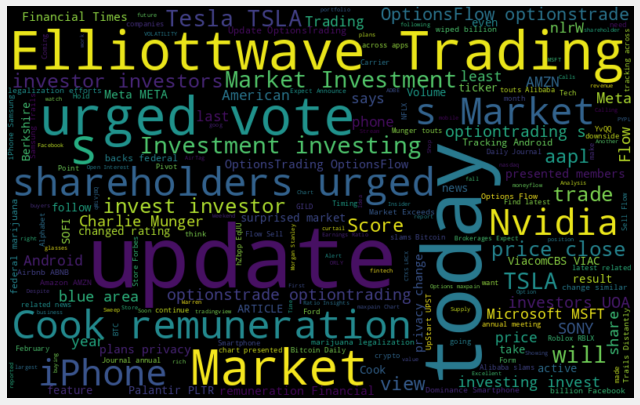

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in df['clean_text']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/daily_words/2022-02-16.png')

In [109]:
new_df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/stock_tracking/sentiment_close_AAPL')
new_df

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-08,174.83,0.165667
1,1,2022-02-09,176.28,0.228348
2,2,2022-02-10,172.12,0.163163
3,3,2022-02-11,168.64,0.142202
4,4,2022-02-14,168.88,0.139211
5,5,2022-02-15,172.79,0.197558
6,6,2022-02-16,172.55,0.124644


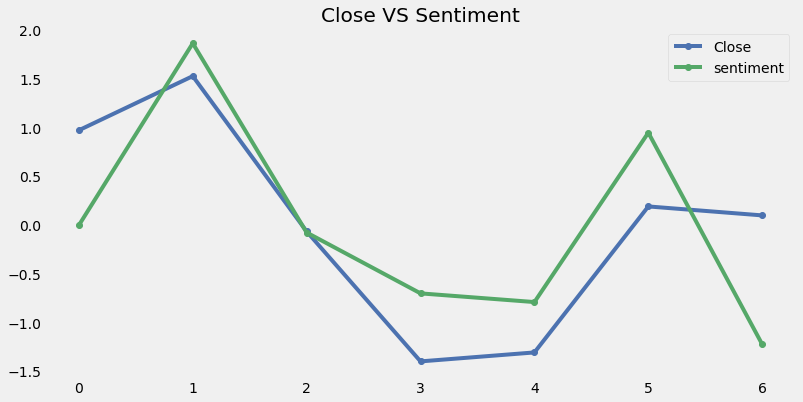

In [114]:
from sklearn.preprocessing import StandardScaler

s= StandardScaler()

#scaling_data

new_df[['Close', 'sentiment']]= s.fit_transform(new_df[['Close', 'sentiment']])

plt.style.use('seaborn-deep');
plt.figure(figsize=(12,6));
plt.plot(new_df.Close, marker='o',label='Close')
plt.plot(new_df.sentiment, marker='o', label='sentiment')
plt.title('Close VS Sentiment')
plt.legend()
plt.grid()

In [111]:
def color_negative_red(value):
    if value < 0:
        color = 'red'
        
    elif value > 0:
        color = 'green'
    
    else:
        color = 'black'
        
    return 'color: %s' % color

In [112]:
new_df['yesterday_sentiment']= new_df['sentiment'].shift(1)
new_df.style.applymap(color_negative_red, subset=['Close','yesterday_sentiment'])

,Unnamed: 0,date,Close,sentiment,yesterday_sentiment
0,0,2022-02-08,0.970063,-0.004790,nan
1,1,2022-02-09,1.525714,1.862758,-0.004790
2,2,2022-02-10,-0.068430,-0.079377,1.862758
3,3,2022-02-11,-1.401993,-0.703910,-0.079377
4,4,2022-02-14,-1.310023,-0.793034,-0.703910
5,5,2022-02-15,0.188319,0.945398,-0.793034
6,6,2022-02-16,0.096349,-1.227045,0.945398


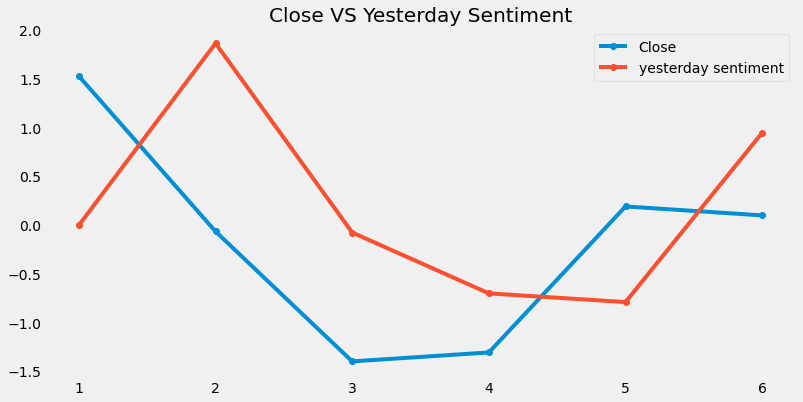

In [113]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.plot(new_df.Close[1:], marker='o',label='Close')
plt.plot(new_df.yesterday_sentiment, marker='o', label='yesterday sentiment')
plt.title('Close VS Yesterday Sentiment')
plt.legend()
plt.grid()